In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import sys
import pandas as pd
import csv
from mpl_toolkits.mplot3d import Axes3D
#sys.path.insert(0, r'/Users/nenetto/Dev/BiiGTK/src/PythonTools')
%matplotlib inline

frame: Details frame of exported data in the following format:

1. Frame Index (integer) 
2. Time Stamp (double) in seconds
3. Trackable Count (integer) number of trackables tracked in current frame
4. ID
5. x
6. y
7. z
8. qx
9. qy
10. qz
11. qw
12. yaw
13. pitch
14. roll
15. Marker Count (integer) Count of all visibile markers in frame"
16. Marker Detail >for each reconstructed 3d marker< (x,y,z,id)

In [2]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
flex_lat_file = 'J:/Dev/AlgiaCervical/DataTest/flexion-lateral.csv'
flex_ext_file = 'J:/Dev/AlgiaCervical/DataTest/flexo-extension.csv'

def getMatrixOptitrack(x, y, z, qx, qy, qz, qw):
    
    R = np.eye(4)
    R[0, 0] = -2 * qy*qy - 2 * qz*qz + 1
    R[0, 1] = 2 * qw*qz + 2 * qx*qy
    R[0, 2] = 2 * qw*qy - 2 * qx*qz
    R[0, 3] = x

    R[1, 0] = 2 * qx*qy - 2 * qw*qz
    R[1, 1] = -2 * qx*qx - 2 * qz*qz + 1
    R[1, 2] = -2 * qw*qx - 2 * qy*qz
    R[1, 3] = y

    R[2, 0] = -2 * qw*qy - 2 * qx*qz
    R[2, 1] = 2 * qw*qx - 2 * qy*qz
    R[2, 2] = -2 * qx*qx - 2 * qy*qy + 1
    R[2, 3] = z

    R[3, 0] = 0.0
    R[3, 1] = 0.0
    R[3, 2] = 0.0
    R[3, 3] = 1.0
    return R


def getDataFromCSVTrackingTools(myfilename):
    data = []
    with open(myfilename, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if row[0] == 'frame':
                data.append({
                            'time':float(row[2]),\
                            'id':float(row[4]),\
                            'x':float(row[5])*1000,\
                            'y':float(row[6])*1000,\
                            'z':float(row[7])*1000,\
                            'qx':float(row[8]),\
                            'qy':float(row[9]),\
                            'qz':float(row[10]),\
                            'qw':float(row[11])\
                    })

    df = pd.DataFrame(data)
    return df


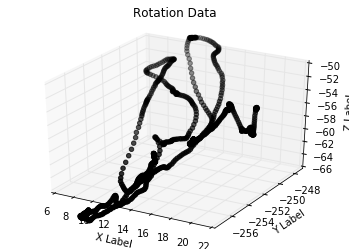

,id,qw,qx,qy,qz,time,x,y,z
0,1,0.626845,-0.165220,0.433516,-0.625964,0.026166,13.72269,-255.14588,-60.07137
1,1,0.626847,-0.165356,0.433433,-0.625984,0.036105,13.72883,-255.14627,-60.08019
2,1,0.626874,-0.165317,0.433353,-0.626023,0.046114,13.73521,-255.15610,-60.07954
3,1,0.626848,-0.165310,0.433378,-0.626033,0.056128,13.73911,-255.16105,-60.08875
4,1,0.626871,-0.165327,0.433320,-0.626046,0.066043,13.73487,-255.15881,-60.09486


In [3]:
df = getDataFromCSVTrackingTools(rotation_file)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.x, df.y, df.z, c='black', marker='o')

ax.axis('equal')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')

plt.show()
df.head(5)

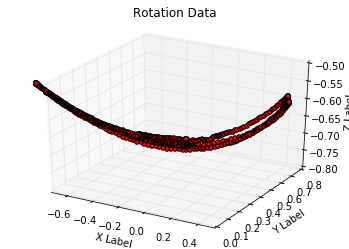

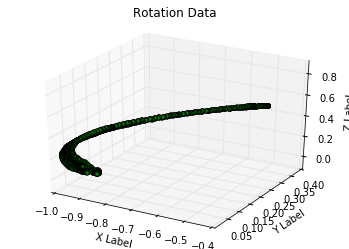

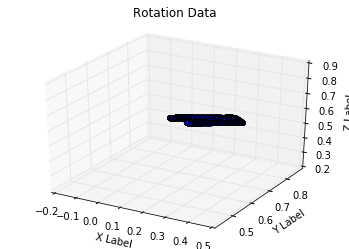

In [4]:
pointx = np.array([1, 0, 0, 1])
pointy = np.array([0, 1, 0, 1])
pointz = np.array([0, 0, 1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointx)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='r', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Data\n')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointy)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='g', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Data\n')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointz)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='b', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Data\n')

plt.show() 

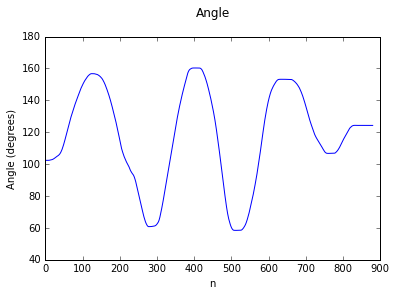

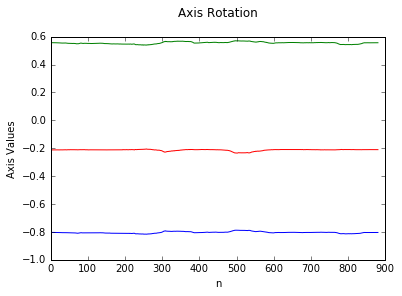

Axis Rotation Median  [-0.21114064  0.55572594 -0.80434458]
Axis Rotation Mean  [-0.21321643  0.55472439 -0.80417214]


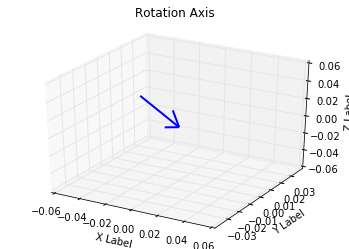

In [5]:

# Quaternion q = cos(a/2) + (ni+nj+nk)*sin (a/2)

# Get the angles

angles = 2 * np.arccos(df.qw.values)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.degrees(angles))
ax.set_xlabel('n')
ax.set_ylabel('Angle (degrees)')
ax.set_title('Angle\n')

plt.show() 


# Extract the axis of rotation

ix = df.qx.values / np.sin(angles/2)
iy = df.qy.values / np.sin(angles/2)
iz = df.qz.values / np.sin(angles/2)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ix,'r')
ax.plot(iy,'g')
ax.plot(iz,'b')
ax.set_xlabel('n')
ax.set_ylabel('Axis Values')
ax.set_title('Axis Rotation\n')

plt.show() 

# For this rotation we extract the mean axis of rotation as

AxisRotationMedian = np.array([np.median(ix),np.median(iy),np.median(iz)])
AxisRotationMean = np.array([np.mean(ix),np.mean(iy),np.mean(iz)])


print 'Axis Rotation Median ', AxisRotationMedian
print 'Axis Rotation Mean ', AxisRotationMean


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0, AxisRotationMedian[0], AxisRotationMedian[1], AxisRotationMedian[2], length=0.1, cmap='Reds', lw=2)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Axis\n')

plt.show() 


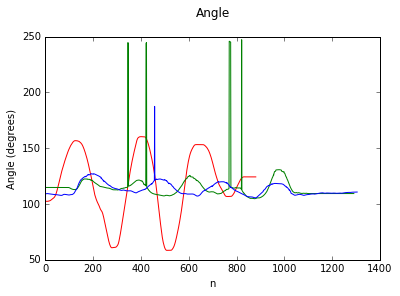

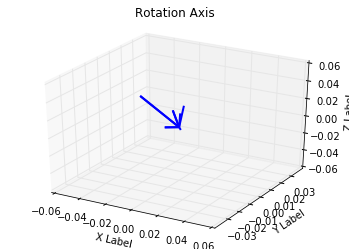

Axis Rotation Median  [-0.21114064  0.55572594 -0.80434458]
Axis Flex Lat Median  [-0.21192332  0.55712517 -0.80291695]
Axis Flex Ext Median  [-0.46123933  0.49450391 -0.72489017]


In [6]:
# Complete Calibration Process and extraction of triedron of head



def CalibrateHead(rotation_file, flex_lat_file, flex_ext_file, plotme = True):
    # Read three files
    rotDF = getDataFromCSVTrackingTools(rotation_file)
    flexLatDF = getDataFromCSVTrackingTools(flex_lat_file)
    flexExtDF = getDataFromCSVTrackingTools(flex_ext_file)
    
    
    anglesrot = 2 * np.arccos(rotDF.qw.values)
    anglesflexLat = 2 * np.arccos(flexLatDF.qw.values)
    anglesflexExt = 2 * np.arccos(flexExtDF.qw.values)

    
    ixrot = rotDF.qx.values / np.sin(anglesrot/2)
    iyrot = rotDF.qy.values / np.sin(anglesrot/2)
    izrot = rotDF.qz.values / np.sin(anglesrot/2)
    
    ixflexLat = flexLatDF.qx.values / np.sin(anglesflexLat/2)
    iyflexLat = flexLatDF.qy.values / np.sin(anglesflexLat/2)
    izflexLat = flexLatDF.qz.values / np.sin(anglesflexLat/2)
    
    ixflexExt = flexExtDF.qx.values / np.sin(anglesflexExt/2)
    iyflexExt = flexExtDF.qy.values / np.sin(anglesflexExt/2)
    izflexExt = flexExtDF.qz.values / np.sin(anglesflexExt/2)
    

    AxisRotationMedianrot = np.array([np.median(ixrot),np.median(iyrot),np.median(izrot)])
    AxisRotationMeanrot = np.array([np.mean(ixrot),np.mean(iyrot),np.mean(izrot)])
    
    AxisRotationMedianflexLat = np.array([np.median(ixflexLat),np.median(iyflexLat),np.median(izflexLat)])
    AxisRotationMeanflexLat = np.array([np.mean(ixflexLat),np.mean(iyflexLat),np.mean(izflexLat)])
    
    AxisRotationMedianflexExt = np.array([np.median(ixflexExt),np.median(iyflexExt),np.median(izflexExt)])
    AxisRotationMeanflexExt = np.array([np.mean(ixflexExt),np.mean(iyflexExt),np.mean(izflexExt)])
    
    
    
    
    if plotme == True:
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(np.degrees(anglesrot), 'r')
        ax.plot(np.degrees(anglesflexLat), 'g')
        ax.plot(np.degrees(anglesflexExt), 'b')
        ax.set_xlabel('n')
        ax.set_ylabel('Angle (degrees)')
        ax.set_title('Angle\n')

        plt.show() 
        
        
        
        
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.quiver(0,0,0, AxisRotationMedianrot[0], AxisRotationMedianrot[1], AxisRotationMedianrot[2], length=0.1, lw=2)
        ax.quiver(0,0,0, AxisRotationMedianflexLat[0], AxisRotationMedianflexLat[1], AxisRotationMedianflexLat[2], length = 0.1, lw=2)
        ax.quiver(0,0,0, AxisRotationMedianflexExt[0], AxisRotationMedianflexExt[1], AxisRotationMedianflexExt[2], length = 0.1, lw=2)

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        ax.axis('equal')
        ax.set_title('Rotation Axis\n')

        plt.show() 
        
        print 'Axis Rotation Median ', AxisRotationMedianrot
        print 'Axis Flex Lat Median ', AxisRotationMedianflexLat
        print 'Axis Flex Ext Median ', AxisRotationMedianflexExt
        
CalibrateHead(rotation_file, flex_lat_file, flex_ext_file)

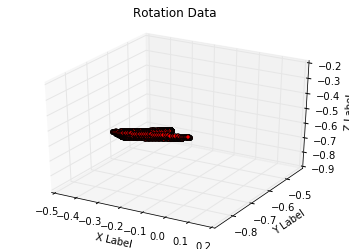

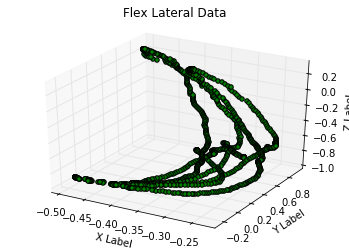

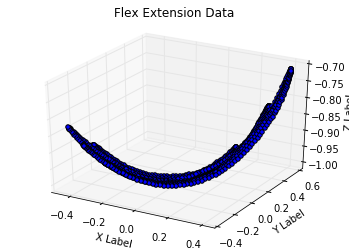

In [33]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
flex_lat_file = 'J:/Dev/AlgiaCervical/DataTest/flexion-lateral.csv'
flex_ext_file = 'J:/Dev/AlgiaCervical/DataTest/flexo-extension.csv'

rotDF = getDataFromCSVTrackingTools(rotation_file)
flexLatDF = getDataFromCSVTrackingTools(flex_lat_file)
flexExtDF = getDataFromCSVTrackingTools(flex_ext_file)


pointRot = np.array([0, 0, -1, 1]) # 
pointflexLat = np.array([1, 0, 0, 1])
pointExtDF = np.array([0, 0, -1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')

for i in range(len(rotDF.index)):
    R = getMatrixOptitrack(0,0,0,rotDF['qx'].loc[i],rotDF['qy'].loc[i],rotDF['qz'].loc[i],rotDF['qw'].loc[i])
    pmov = np.dot(R,pointRot)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='r', marker='o')
    plt.axis('tight')
  
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')
plt.axis('equal')

plt.show() 


#############

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')

for i in range(len(flexLatDF.index)):
    R = getMatrixOptitrack(0,0,0,flexLatDF['qx'].loc[i],flexLatDF['qy'].loc[i],flexLatDF['qz'].loc[i],flexLatDF['qw'].loc[i])
    pmov = np.dot(R,pointflexLat)
    plt.axis('tight')
    ax.scatter(pmov[0],pmov[1],pmov[2], c='g', marker='o')
  
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Flex Lateral Data\n')

plt.show() 



#############

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')

    
for i in range(len(flexExtDF.index)):
    R = getMatrixOptitrack(0,0,0,flexExtDF['qx'].loc[i],flexExtDF['qy'].loc[i],flexExtDF['qz'].loc[i],flexExtDF['qw'].loc[i])
    pmov = np.dot(R,pointExtDF)
    plt.axis('tight')
    ax.scatter(pmov[0],pmov[1],pmov[2], c='b', marker='o')
  
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Flex Extension Data\n')

plt.show() 




In [ ]:

rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
flex_lat_file = 'J:/Dev/AlgiaCervical/DataTest/flexion-lateral.csv'
flex_ext_file = 'J:/Dev/AlgiaCervical/DataTest/flexo-extension.csv'

rotDF = getDataFromCSVTrackingTools(rotation_file)
flexLatDF = getDataFromCSVTrackingTools(flex_lat_file)
flexExtDF = getDataFromCSVTrackingTools(flex_ext_file)


pointRot = np.array([1, 0, 0, 1]) # 
pointflexLat = np.array([1, 0, 0, 1])
pointExtDF = np.array([0, 0, 1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')

for i in range(len(rotDF.index)):
    R = getMatrixOptitrack(0,0,0,rotDF['qx'].loc[i],rotDF['qy'].loc[i],rotDF['qz'].loc[i],rotDF['qw'].loc[i])
    pmov = np.dot(R,pointRot)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='r', marker='o')
    ax.axis('tight')
  
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')
ax.axis('equal')




#############


plt.axis('equal')

for i in range(len(flexLatDF.index)):
    R = getMatrixOptitrack(0,0,0,flexLatDF['qx'].loc[i],flexLatDF['qy'].loc[i],flexLatDF['qz'].loc[i],flexLatDF['qw'].loc[i])
    pmov = np.dot(R,pointflexLat)
    ax.axis('tight')
    ax.scatter(pmov[0],pmov[1],pmov[2], c='g', marker='o')
  
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Flex Lateral Data\n')





#############

plt.axis('equal')

    
for i in range(len(flexExtDF.index)):
    R = getMatrixOptitrack(0,0,0,flexExtDF['qx'].loc[i],flexExtDF['qy'].loc[i],flexExtDF['qz'].loc[i],flexExtDF['qw'].loc[i])
    pmov = np.dot(R,pointExtDF)
    ax.axis('tight')
    ax.scatter(pmov[0],pmov[1],pmov[2], c='b', marker='o')
  
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Flex Extension Data\n')

plt.show() 

